In [125]:
import json
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

In [126]:
# Load the JSON file
with open('../Data/pascal_classes.json') as f:
    data = json.load(f)

In [127]:
# labels => image classes
labels = []

In [128]:
# Iterate over the data and add classes to the list
for item in data:
    for annotation in item['annotations']:
        label = annotation['label']
        labels.append(label)

In [129]:
# Convert the list to a DataFrame and count occurrences
df = pd.DataFrame(labels, columns=['Label'])
df = df['Label'].value_counts().reset_index()
df.columns = ['Label', 'Count']
df['Percentage'] = (df['Count'] / df['Count'].sum())

In [130]:
# Print dataframe
print(df)
# Export DataFrame to CSV
df.to_csv('../Data/class_count.csv', index=False)

            Label  Count  Percentage
0             Leg  12227    0.100839
1           Torso   8664    0.071454
2            Head   8595    0.070885
3             Ear   7750    0.063916
4             Arm   7521    0.062027
5             Eye   7202    0.059396
6          Person   5487    0.045252
7            Hand   5142    0.042407
8            Neck   4633    0.038209
9           Wheel   4388    0.036189
10           Nose   3942    0.032511
11           Hair   3791    0.031265
12           Foot   3167    0.026119
13          Ebrow   3042    0.025088
14         Window   3031    0.024997
15          Mouth   2804    0.023125
16      Headlight   1918    0.015818
17         Muzzle   1744    0.014383
18          Chair   1657    0.013666
19           Tail   1603    0.013220
20  artifact_body   1574    0.012981
21            Car   1289    0.010631
22           Body   1191    0.009822
23         Mirror   1143    0.009427
24            Dog    970    0.008000
25          Coach    859    0.007084
2

In [131]:
# Specify the labels of interest
labels_of_interest = ['Person', 'Wheel', 'Dog', 'Boat', 'Plant']

In [132]:
# Create a new column 'Label' where labels not in 'labels_of_interest' are replaced with 'Other'
df['Label'] = df.apply(lambda row: row['Label'] if row['Label'] in labels_of_interest else 'Other', axis=1)

# Plot as a Bar Chart

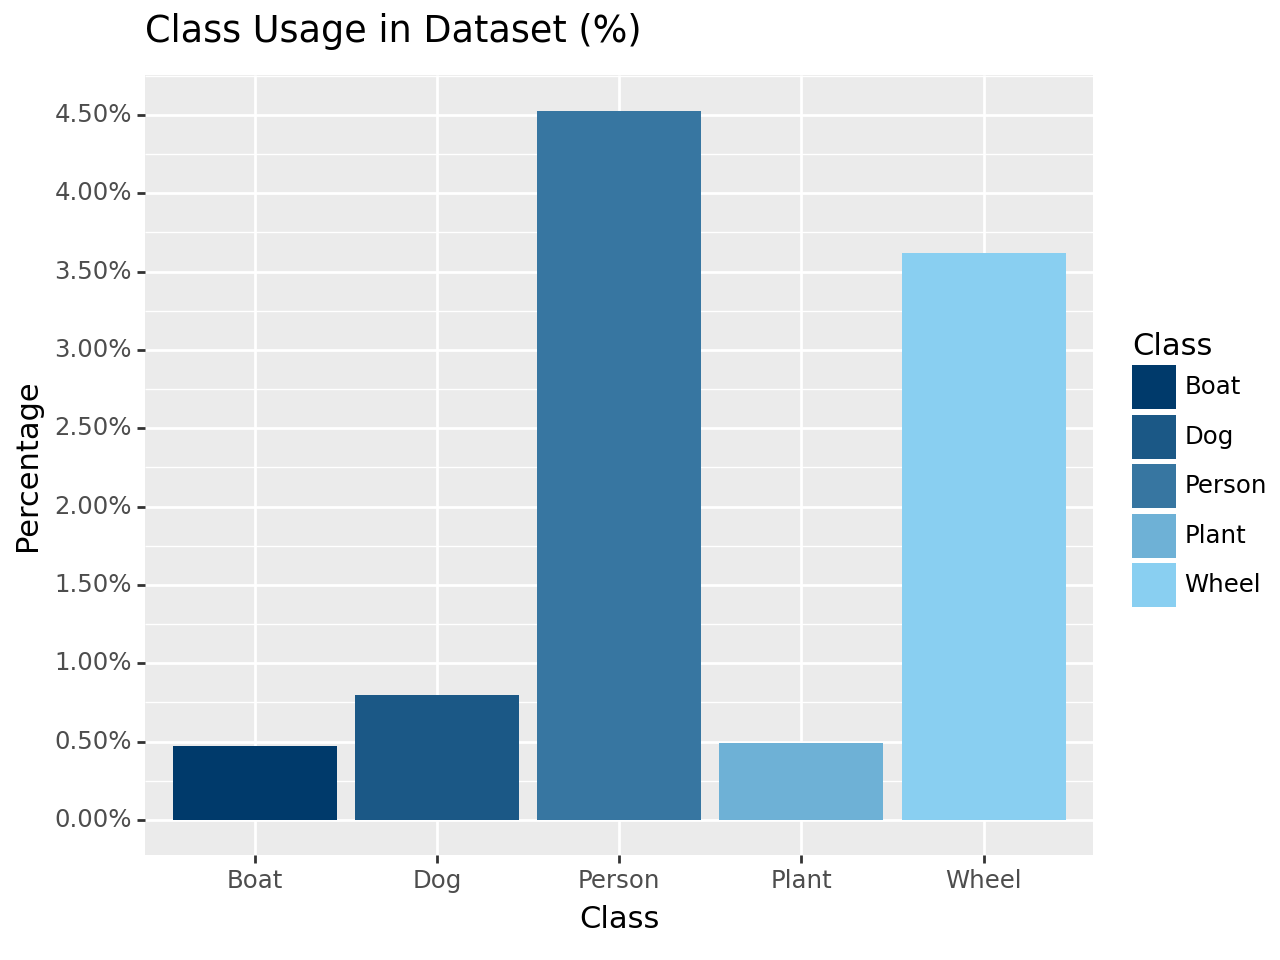

In [135]:
# Group by the new 'Label' column and sum the 'Percentage' column
df_grouped = df.groupby('Label', as_index=False).agg({'Percentage': 'sum'})

df_grouped = df_grouped[df_grouped['Label'] != 'Other']


# Plot
plot = (ggplot(df_grouped, aes(x='Label', y='Percentage', fill='Label'))
        + geom_bar(stat='identity')
        + scale_fill_manual(values=['#003a6b', '#1b5886', '#3776a1', '#6eb1d6', '#89cff1'])
        + scale_y_continuous(labels=percent_format(), breaks=[i/200 for i in range(0,11)]) # Adjusted range and step size
        + labs(x='Class', y='Percentage', title='Class Usage in Dataset (%)')
        + guides(fill=guide_legend(title='Class'))
        )

plot.draw()


In [136]:
# Save plot as file
plot.save("../Data/distribution-classes-barchart.png", dpi=300)

/Users/paulrecker/Developer/_fontys/latex/projects/ARDA-ML/data-vis/venv/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/paulrecker/Developer/_fontys/latex/projects/ARDA-ML/data-vis/venv/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ../Data/distribution-classes-barchart.png
